# Predicción de enfermedades cardiacas con Arboles de Decisión

## 1. Presentación:

Somos un equipo de trabajo conformado por estudiantes de Coderhouse.
 
Nos planteamos predecir ataques cardíacos en relación a un rango etario y género, por lo tanto el análisis que realizaremos será tanto bivariado como multivariado.
 
El equipo se encuentra conformado por:<br>
- Richard Hervier
- Omar Honigman
- Nicolas Abihaggle
- Mayco Ñañez

### 1.1 Objetivos del trabajo:

Las enfermedades cardiovasculartes son un conjunto de trastornos del corazón responsables de millones de fallecimientos al año.
Por lo tanto, queremos generar un modelo que permita pesquisar indicios de si los pacientes podrían tener complicaciones cardíacas, a los fines de que los pacientes reciban tratamientos para prevenir ataques cardíacos en relación a un rango etario y género.

## 2. Revision del DataFrame

### 2.1 Importación de las librerías a usar:

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

### 2.2 Creación del dataframe:

In [25]:
df = pd.read_csv("data_final.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


### 2.3 Caracteristicas:

In [26]:
print('\033[1m'+f"La data tiene {df.shape[0]} observaciones y {df.shape[1]} variables.")

La data tiene 319795 observaciones y 18 variables.


In [27]:
print('\033[1m'+"Revision de datos faltantes:")
df.isnull().any()

Revision de datos faltantes:


HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

Se observa que no hay datos faltantes.

In [28]:
print('\033[1m'+"Principales caracteristicas estadisticas:")
df.describe(include="all")

Principales caracteristicas estadisticas:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795,319795.000000,319795,319795,319795,319795.00000,319795.000000,319795,319795,319795,319795,319795,319795,319795,319795.000000,319795,319795,319795
unique,2,NaN,2,2,2,NaN,NaN,2,2,13,6,4,2,5,NaN,2,2,2
top,No,NaN,No,No,No,NaN,NaN,No,Female,65-69,White,No,Yes,Very good,NaN,No,No,No
freq,292422,NaN,187887,298018,307726,NaN,NaN,275385,167805,34151,245212,269653,247957,113858,NaN,276923,308016,289976
mean,NaN,28.325399,NaN,NaN,NaN,3.37171,3.898366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.097075,NaN,NaN,NaN
std,NaN,6.356100,NaN,NaN,NaN,7.95085,7.955235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.436007,NaN,NaN,NaN
min,NaN,12.020000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
25%,NaN,24.030000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN
50%,NaN,27.340000,NaN,NaN,NaN,0.00000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,NaN,NaN
75%,NaN,31.420000,NaN,NaN,NaN,2.00000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN


### 2.4 Cambios en el dataframe:
Cambiaremos los valores de la columna "HeartDisease", "Sex", "Smoking" y "AlcoholDrinking" , para facilitar el análisis.
- "No" cambiara a "0"
- "Yes" cambiara a "1" <br>

En el caso del Sexo, lo cambiaremos a:
- "Male" cambiara a "0"
- "Female" cambiara a "1"

In [29]:
df["HeartDisease"] = df["HeartDisease"].replace({"No": 0, "Yes": 1})
df["Sex"] = df["Sex"].replace({"Male": 0, "Female": 1})
df["Smoking"] = df["Smoking"].replace({"No": 0, "Yes": 1})
df["AlcoholDrinking"] = df["AlcoholDrinking"].replace({"No": 0, "Yes": 1})
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,No,3.0,30.0,No,1,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,Yes,0.0,0.0,No,1,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,1,0,No,20.0,30.0,No,0,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,0,0,No,0.0,0.0,No,1,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,0,0,No,28.0,0.0,Yes,1,40-44,White,No,Yes,Very good,8.0,No,No,No


## 3. Árbol de decisión:

### 3.1 Importación de los modelos a usar:

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

### 3.2 Preparación de la data 

Para entrenar el modelos solo usaremos las variables "AgeCategory", "Smoking", y "Sex", por lo que separaremos solo lo que usaremos.

In [31]:
# Creamos un nuevo dataframe solo con las variables a usar::
df_arbol = df[["AgeCategory", "Sex", "Smoking", "AlcoholDrinking", "HeartDisease"]].copy()
df_arbol.head()

,AgeCategory,Sex,Smoking,AlcoholDrinking,HeartDisease
0,55-59,1,1,0,0
1,80 or older,1,0,0,0
2,65-69,0,1,0,0
3,75-79,1,0,0,0
4,40-44,1,0,0,0


La edad juega un papel muy importante para nuestro análisis, porque lo modificaremos para poder usarlo con el árbol de decisiones:

In [32]:
df_arbol["AgeCategory"] = df_arbol["AgeCategory"].replace({"18-24": 0, "25-29": 1, "30-34": 2, 
                                               "35-39": 3, "40-44": 4, "45-49": 5, 
                                               "50-54": 6, "55-59": 7, "60-64": 8, 
                                               "65-69": 9, "70-74": 10, "75-79": 11, 
                                               "80 or older": 12})
df_arbol.head()

,AgeCategory,Sex,Smoking,AlcoholDrinking,HeartDisease
0,7,1,1,0,0
1,12,1,0,0,0
2,9,0,1,0,0
3,11,1,0,0,0
4,4,1,0,0,0


### 3.3 Creación del Modelo:

In [33]:
# Separacion de features en X e y:
X = df_arbol.drop("HeartDisease", axis=1) #Elimino de mi dataset la variable a predecir
y = df_arbol.HeartDisease #"y" representa la target

In [34]:
# Separación de la data en 70% y 30%:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25) 

In [35]:
# Creación y entrenamiento del modelo:
arbol_de_decision = DecisionTreeClassifier(max_depth=3, random_state = 25)
arbol_de_decision.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=25)

In [36]:
y_train_pred = arbol_de_decision.predict(X_train) #Prediccion en Train
y_test_pred = arbol_de_decision.predict(X_test) #Prediccion en Test

In [37]:
train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de entrenamiento:', train_accuracy)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de entrenamiento: 0.91499892788221
% de aciertos sobre el set de evaluación: 0.9130176466296293


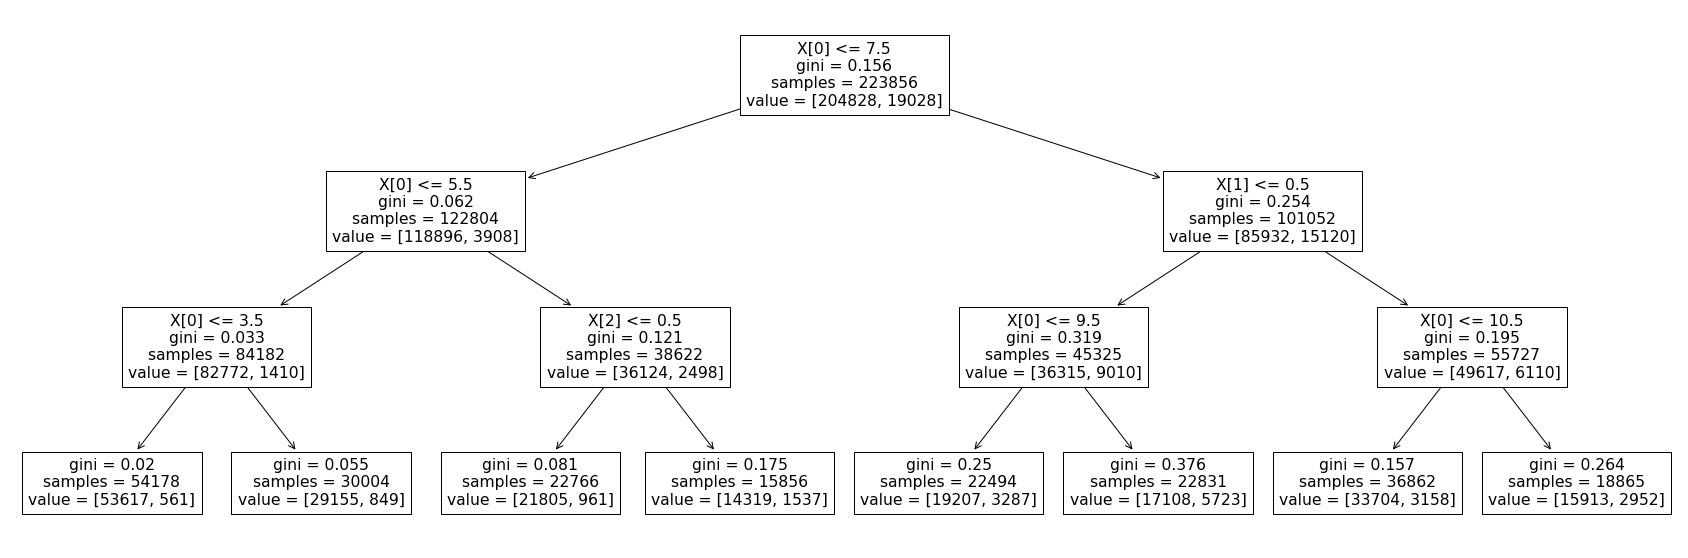

In [49]:
from sklearn import tree
plt.figure(figsize=(30,10))
tree.plot_tree(arbol_de_decision)
plt.show()

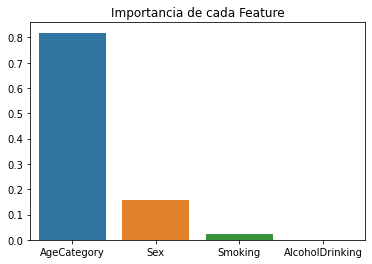

In [38]:
importances = arbol_de_decision.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada Feature')
plt.show()

### 3.4 Conclusiones:

Podemos observar que obtenemos un accuracy de mas del 90%, donde la variable mas importante es "AgeCategory". Sin embargo, es importante revisar la variable target de nuestro dataset:

In [39]:
rev = pd.DataFrame(df["HeartDisease"].value_counts())
rev["%"] = round((rev["HeartDisease"]*100)/rev["HeartDisease"].sum(), 2)
rev

,HeartDisease,%
0,292422,91.44
1,27373,8.56


Como se observa, nuestra data esta altamente desbalanceada, por lo que para obtener un accuracy de 90% solo es necesario predecir siempre con un "0". <br>
Por tal motivo, se determina que hacer predicciones de nuestra data, con un árbol de decisiones, no sirve.

## 4. Random Forest:

Creamos el random forest:

In [46]:
model = RandomForestClassifier(random_state=11, n_estimators=100, class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=11)

In [47]:
y_test_pred = model.predict(X_test)

In [48]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.6211029925265013


### 4.1 Conclusiones:

Observamos que al realizar un random forest con 100 estimaciones, el porcentaje de aciertos bajo a 62% a comparación de un solo árbol de decisiones. Sin embargo, al estar la data desbalanceadas, los resultados aun no son satisfactorios. En próximas entregas se mejorara la data.